In [1]:
import numpy as np
from celmech.maps import StandardMap
import matplotlib.pyplot as plt
from matplotlib import rcParams
# Plot settings
rcParams['font.size']=16
rcParams['axes.linewidth'] = 2
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.width'] = 2
rcParams['xtick.major.size'] = 8
rcParams['ytick.major.size'] = 8
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

Create map object

In [2]:
K = 1.2
smap = StandardMap(K,mod_p=True) # mod_p=True means the p coordinate will be taken modulo 2pi

Generate trajectories from multiple initial conditions.

In [3]:
Ntraj = 20 # number of trajectories
Npts = 8000 # number of points per trajectory
all_points = np.zeros((Ntraj,Npts,2))

for i,p0 in enumerate(np.linspace(0,2*np.pi,Ntraj)):
    theta0 = np.random.uniform(0,2*np.pi)
    x = (theta0,p0)
    for j in range(Npts):
        all_points[i,j] = x
        x = smap(x)

Plot results

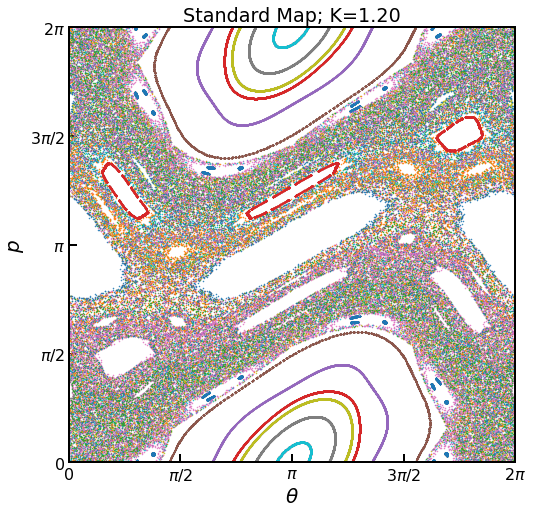

In [4]:
fig,ax= plt.subplots(1,figsize=(8,8))
for traj_pts in all_points:
    plt.plot(*traj_pts.T,'.',ms=1)
    
# Make pretty
plt.xlabel(r"$\theta$",fontsize=20)
plt.ylabel("$p$",fontsize=20)
plt.title("Standard Map; K={:.2f}".format(smap.K))
plt.xlim(0,2*np.pi)
plt.ylim(0,2*np.pi)
lbls=["$0$","$\pi/2$","$\pi$","$3\pi/2$","$2\pi$"]
locs = np.linspace(0,2*np.pi,5)
plt.xticks(locs,lbls);
plt.yticks(locs,lbls);